## DeepLearning04(노드11~노드12)
- 노드11 : 딥러닝 모델 실습
- 노드12 : 프로젝트(세 가지 데이터셋으로 실습)
  - Boston 주택가격 예측
  - Reuters 딥러닝모델
  - CIFAR10 딥러닝모델
- colab에서 하다가 gpu 사용량 제한으로 LMS로 옮겨서 학습함

### 노드11 딥러닝 모델 실습

#### 노드11-01 Fashion MNIST 모델

##### 데이터 로드
- Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정
  - 클래스 이름은 https://github.com/zalandoresearch/fashion-mnist 에서 확인 가능

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [ ]:
# x_train_set 구성 확인
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

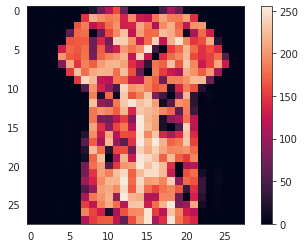

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn-white')
sns.set_style("white")

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

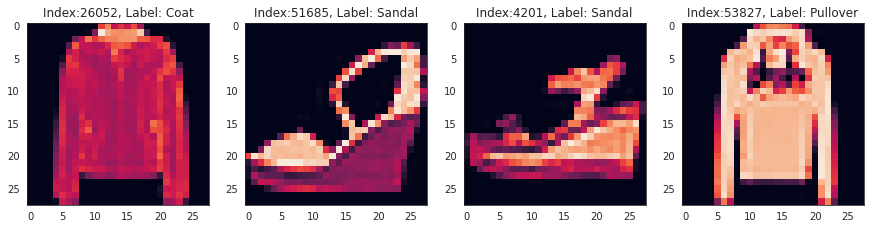

In [ ]:
# Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여
# 인덱스와 레이블, 그리고 해당 패션 이미지를 출력합니다.

import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize = (15,10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx,:]
  label = y_train_full[idx]
  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title(f'Index:{idx}, Label: {class_names[label]}')


##### 데이터 전처리
- 딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어보자
- 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추는 것도 가능

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[:3]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,  25, 130, ...,  79,  41,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_val = x_val.reshape(-1,28*28)
x_test = x_test.reshape(-1, 28*28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [ ]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [ ]:
# 기존 데이터셋을 255로 나누면 0~1사이로 범위 축소됨

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

##### 모델 구성
- Sequential() 함수 사용
  - 첫 번째 input은 784개 layer그대로 사용
  - 두 번째는 유닛수 512개를 가지는 Dense layer추가(activation='sigmoid')
  - 마지막 output은 10개 결과를 가지는 Dense layer추가(activation='softmax')

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation = 'sigmoid'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


##### 모델 컴파일 및 학습

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 1s 6ms/step - loss: 2.2145 - accuracy: 0.2991 - val_loss: 2.0625 - val_accuracy: 0.4042
Epoch 2/60
83/83 [==============================] - 0s 3ms/step - loss: 1.9359 - accuracy: 0.5659 - val_loss: 1.8252 - val_accuracy: 0.5403
Epoch 3/60
83/83 [==============================] - 0s 3ms/step - loss: 1.7260 - accuracy: 0.6352 - val_loss: 1.6374 - val_accuracy: 0.6319
Epoch 4/60
83/83 [==============================] - 0s 3ms/step - loss: 1.5614 - accuracy: 0.6695 - val_loss: 1.4979 - val_accuracy: 0.6597
Epoch 5/60
83/83 [==============================] - 0s 3ms/step - loss: 1.4318 - accuracy: 0.6907 - val_loss: 1.3774 - val_accuracy: 0.6783
Epoch 6/60
83/83 [==============================] - 0s 3ms/step - loss: 1.3279 - accuracy: 0.7015 - val_loss: 1.2848 - val_accuracy: 0.6934
Epoch 7/60
83/83 [==============================] - 0s 3ms/step - loss: 1.2441 - accuracy: 0.7085 - val_loss: 1.2110 - val_accuracy: 0.7004
Epoch 8/60
83/83 [==

In [ ]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

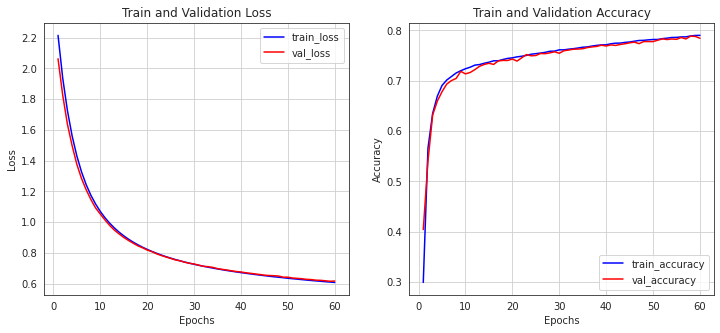

In [ ]:
show_history(history)

##### 모델 평가 및 예측

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7750


[0.6303673982620239, 0.7749999761581421]

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.44145535e-02 9.34703827e-01 2.95146671e-03 1.44137153e-02
 2.79309805e-02 3.15359757e-05 5.44145610e-03 4.19205498e-05
 5.50771983e-05 1.54930858e-05]
1
Trouser


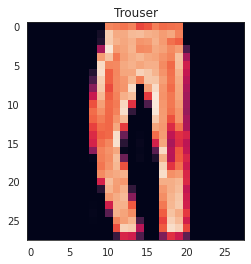

In [ ]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [ ]:
# 이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [ ]:
# 전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

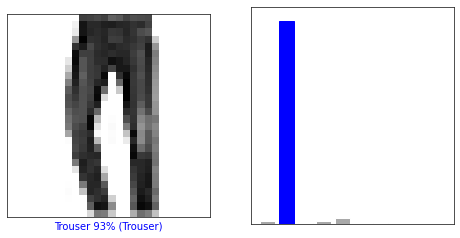

In [ ]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

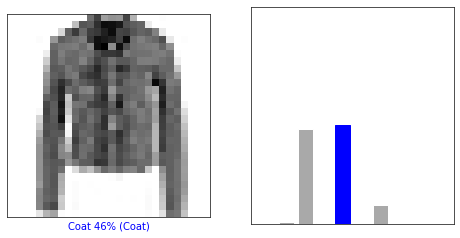

In [ ]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

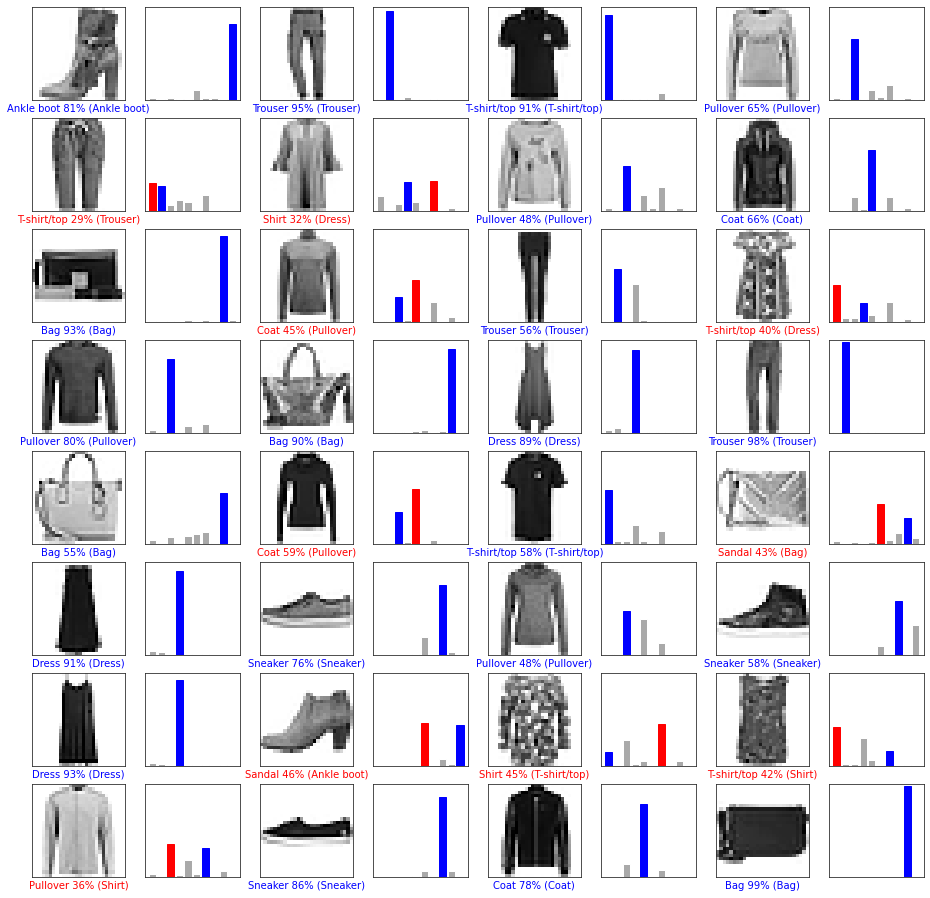

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis = -1),
                            np.argmax(pred_ys, axis = -1),
                            target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.82      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.71      0.59      0.64      1000
       Dress       0.79      0.81      0.80      1000
        Coat       0.59      0.81      0.68      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.48      0.29      0.36      1000
     Sneaker       0.85      0.85      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.87      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



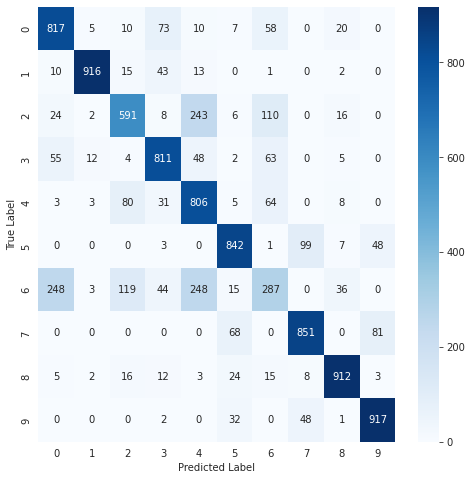

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Shirt를 가장 구분하기 어려워했으며
# T-shirt/top(183회), Pullover(124회), Coat(107회)으로 많이 착각했습니다.(일부 내용은 다를 수 있습니다.)

#### 11-02 모델 최적화
- 결과 요약
  - 초기-1(loss: 0.6085 - accuracy: 0.7903 - val_loss: 0.6178 - val_accuracy: 0.7846)
    - 평가결과 : loss: 0.6304 - accuracy: 0.7750
    - callback, early-stopping 미설정
  - 초기-2(loss: 0.3746 - accuracy: 0.8669 - val_loss: 0.4074 - val_accuracy: 0.8589)
    - 평가결과 : loss: 0.4272 - accuracy: 0.8460
  - 활성화 함수 변경(loss: 0.2149 - accuracy: 0.9246 - val_loss: 0.3197 - val_accuracy: 0.8898)
    - 평가결과 : loss: 0.3414 - accuracy: 0.8803
    - 활성화함수 변경(sigmoid -> relu로 변경)
  - 옵티마이저 변경(loss: 0.1583 - accuracy: 0.9401 - val_loss: 0.3727 - val_accuracy: 0.8904)
    - 평가결과 : loss: 0.3433 - accuracy: 0.8808
    - 옵티마이저 : SGD -> Adam
    - epochs 60까지 학습 안하고 19에서 중단
  - L2규제 추가(loss: 0.3782 - accuracy: 0.8848 - val_loss: 0.4469 - val_accuracy: 0.8679)
    - 평가결과 : loss: 0.4366 - accuracy: 0.8679
    - epochs 60까지 안하고 37회에서 중단
  - Dropout(loss: 0.5737 - accuracy: 0.8257 - val_loss: 0.5215 - val_accuracy: 0.8456)
    - 평가결과 : loss: 0.5438 - accuracy: 0.8365
    - epochs 59회?
  - Dropout & L2 규제 빼보기(loss: 0.2645 - accuracy: 0.9011 - val_loss: 0.3386 - val_accuracy: 0.8870)
    - 평가결과 : loss: 0.3463 - accuracy: 0.8785
    - epochs : 28회
  - Batch Normalization(loss: 0.2300 - accuracy: 0.9155 - val_loss: 0.3828 - val_accuracy: 0.8766)
    - 평가결과 :loss: 0.3745 - accuracy: 0.8670
    - epochs : 22회
  - Batch Normalization + Dropout(loss: 0.2905 - accuracy: 0.8913 - val_loss: 0.3309 - val_accuracy: 0.8857)
    - loss: 0.3540 - accuracy: 0.8753
    - epochs : 58회

##### Early stopping
- 딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용
  - ModelCheckpoint는 Keras의 버전에 따라 파라미터나 사용 방식이 약간씩 달라졌음에 유의(LMS환경과 colab에서 약간 다름)

In [ ]:
# LMS에서 학습한 방식
# from tensorflow.keras import callbacks

# check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
#                                            save_best_only=True)
# early_stopping_cb = callbacks.EarlyStopping(patience=10,
#                                             monitor='val_loss',
#                                             restore_best_weights=True)
# history = model.fit(x_train, y_train, epochs=60,
#                     validation_data=(x_val, y_val),
#                     callbacks=[check_point_cb, early_stopping_cb])

## 이렇게 refactoring 함

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# keras 포맷 사용하여 모델 저장
check_point_cb = ModelCheckpoint(
    filepath = 'fashion_mnist_model.keras', # 최신 keras 저장 포맷
    monitor = 'val_loss', # validation_loss기준
    mode = 'min', # 작을 수록 좋음
    save_best_only = True,
    verbose = 1 # 저장될 때 로그 출력
)

early_stopping_cb = EarlyStopping(
    monitor = 'val_loss',
    patience = 10, # 10번 연속 개선 없으면 중단
    restore_best_weights = True,
    verbose = 1
)

# 훈련

history = model.fit(
    x_train, y_train,
    epochs = 60,
    validation_data=(x_val, y_val),
    callbacks = [check_point_cb, early_stopping_cb]
)

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5945 - accuracy: 0.7940 - val_loss: 0.5885 - val_accuracy: 0.7964

Epoch 00001: val_loss improved from inf to 0.58846, saving model to fashion_mnist_model.keras
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5667 - accuracy: 0.8027 - val_loss: 0.5679 - val_accuracy: 0.8002

Epoch 00002: val_loss improved from 0.58846 to 0.56785, saving model to fashion_mnist_model.keras
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5462 - accuracy: 0.8094 - val_loss: 0.5531 - val_accuracy: 0.8044

Epoch 00003: val_loss improved from 0.56785 to 0.55308, saving model to fashion_mnist_model.keras
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5296 - accuracy: 0.8158 - val_loss: 0.5308 - val_accuracy: 0.8155

Epoch 00004: val_loss improved from 0.55308 to 0.53079, saving model to fashion_mnist_model.keras
Epoch 5/60
1313/1313 [==========

1313/1313 [==============================] - 3s 2ms/step - loss: 0.4021 - accuracy: 0.8568 - val_loss: 0.4294 - val_accuracy: 0.8515

Epoch 00037: val_loss improved from 0.42946 to 0.42944, saving model to fashion_mnist_model.keras
Epoch 38/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4011 - accuracy: 0.8580 - val_loss: 0.4306 - val_accuracy: 0.8499

Epoch 00038: val_loss did not improve from 0.42944
Epoch 39/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3994 - accuracy: 0.8584 - val_loss: 0.4237 - val_accuracy: 0.8535

Epoch 00039: val_loss improved from 0.42944 to 0.42370, saving model to fashion_mnist_model.keras
Epoch 40/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8580 - val_loss: 0.4225 - val_accuracy: 0.8553

Epoch 00040: val_loss improved from 0.42370 to 0.42253, saving model to fashion_mnist_model.keras
Epoch 41/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3971

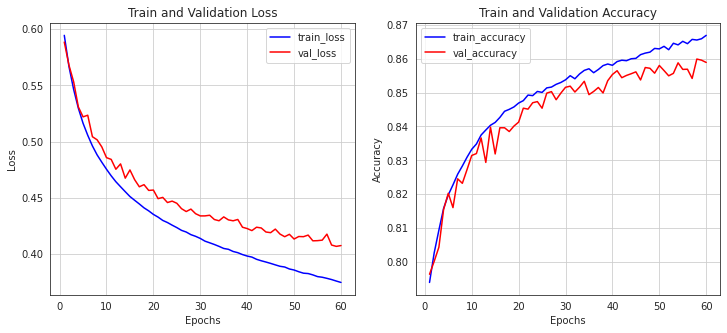

In [ ]:
show_history(history) # 모델 학습 히스토리 시각화

In [ ]:
model.evaluate(x_test, y_test) # 모델 평가 결과 확인

313/313 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8460


[0.42723754048347473, 0.8460000157356262]

##### 활성화 함수
- sigmoid에서 ReLU로 변경

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs = 60,
                     validation_data = (x_val, y_val),
                     callbacks = [check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7764 - accuracy: 0.7536 - val_loss: 0.5760 - val_accuracy: 0.8110

Epoch 00001: val_loss did not improve from 0.40668
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5317 - accuracy: 0.8210 - val_loss: 0.5082 - val_accuracy: 0.8303

Epoch 00002: val_loss did not improve from 0.40668
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy: 0.8333 - val_loss: 0.4894 - val_accuracy: 0.8351

Epoch 00003: val_loss did not improve from 0.40668
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4543 - accuracy: 0.8437 - val_loss: 0.4676 - val_accuracy: 0.8394

Epoch 00004: val_loss did not improve from 0.40668
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4348 - accuracy: 0.8503 - val_loss: 0.4418 - val_accuracy: 0.8487

Epoch 00005: val_loss did not improve from 0.40668
Epoch 6/60
1313/1313

1313/1313 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9087 - val_loss: 0.3584 - val_accuracy: 0.8752

Epoch 00040: val_loss did not improve from 0.32978
Epoch 41/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9090 - val_loss: 0.3417 - val_accuracy: 0.8803

Epoch 00041: val_loss did not improve from 0.32978
Epoch 42/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.9108 - val_loss: 0.3307 - val_accuracy: 0.8849

Epoch 00042: val_loss did not improve from 0.32978
Epoch 43/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9120 - val_loss: 0.3326 - val_accuracy: 0.8842

Epoch 00043: val_loss did not improve from 0.32978
Epoch 44/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9138 - val_loss: 0.3242 - val_accuracy: 0.8881

Epoch 00044: val_loss improved from 0.32978 to 0.32417, saving model to fashio

###### 시각화 함수 정의

In [ ]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

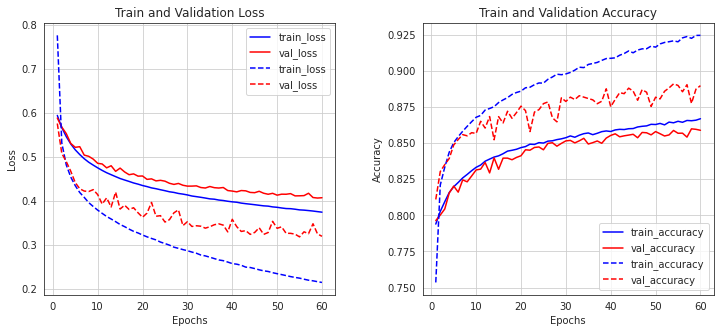

In [ ]:
diff_history(history, history2)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8803


[0.3413512110710144, 0.880299985408783]

##### 옵티마이저

In [ ]:
from tensorflow.keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

# 모델 컴파일

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history3 = model.fit(x_train, y_train, epochs = 60,
                     validation_data = (x_val, y_val),
                     callbacks = [check_point_cb, early_stopping_cb])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8218 - val_loss: 0.4187 - val_accuracy: 0.8536

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8618 - val_loss: 0.3628 - val_accuracy: 0.8693

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3352 - accuracy: 0.8761 - val_loss: 0.44

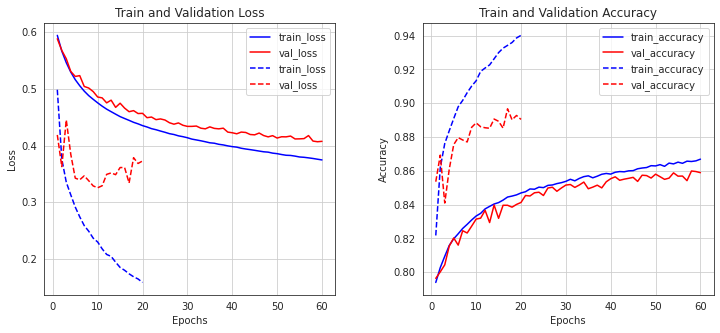

In [ ]:
diff_history(history, history3)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8808


[0.34327924251556396, 0.8808000087738037]

##### 규제
- Dense layer에 L2규제 적용

In [ ]:
from tensorflow.keras import models, layers, regularizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape = (784,)))
model.add(layers.Dense(512,
                       activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# tensorflow 버전 확인!(참고)
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7733 - accuracy: 0.8138 - val_loss: 0.6025 - val_accuracy: 0.8366

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5604 - accuracy: 0.8399 - val_loss: 0.5692 - val_accuracy: 0.8387

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5146 - accuracy: 0.8493 - val_loss: 0.5059 - val_accuracy: 0.8493

Epoch 00003: val_loss did not improve from 0.31845
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4931 - accuracy: 0.8526 - val_loss: 0.5014 - val_accuracy: 0.8496

Epoch 00004: val_loss did not improve from 0.31845
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4798 - accuracy: 0.8570 - val_loss: 0.4697 - val_accuracy: 0.8632

Epoch 00005: val_loss did not improve from 0.31845
Epoch 6/60
1313/1313

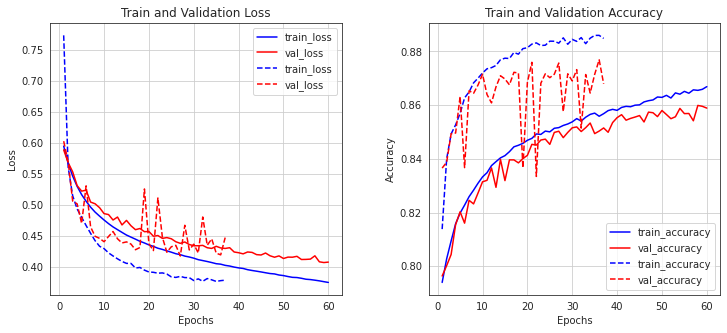

In [ ]:
# 기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제
diff_history(history, history4)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8679


[0.43659311532974243, 0.867900013923645]

###### 드롭아웃
- dense-layer에(중간층) 50%의 드롭아웃 적용

In [ ]:
from tensorflow.keras import models, layers, regularizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512,
                       activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5)) # Dropout은 별도 레이어로 추가
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8899 - accuracy: 0.7827 - val_loss: 0.6732 - val_accuracy: 0.8126

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.6649 - accuracy: 0.8116 - val_loss: 0.5883 - val_accuracy: 0.8393

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.6397 - accuracy: 0.8136 - val_loss: 0.5989 - val_accuracy: 0.8259

Epoch 00003: val_loss did not improve from 0.31845
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6242 - accuracy: 0.8171 - val_loss: 0.5537 - val_accuracy: 0.8412

Epoch 00004: val_loss did not improve from 0.31845
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6112 - accuracy: 0.8221 - val_loss: 0.5479 - val_accuracy: 0.8488

Epoch 00005: val_loss did not improve from 0.31845
Epoch 6/60
1313/1313


Epoch 00042: val_loss did not improve from 0.31845
Epoch 43/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5709 - accuracy: 0.8271 - val_loss: 0.4908 - val_accuracy: 0.8570

Epoch 00043: val_loss did not improve from 0.31845
Epoch 44/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5732 - accuracy: 0.8250 - val_loss: 0.4948 - val_accuracy: 0.8612

Epoch 00044: val_loss did not improve from 0.31845
Epoch 45/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5687 - accuracy: 0.8297 - val_loss: 0.5326 - val_accuracy: 0.8359

Epoch 00045: val_loss did not improve from 0.31845
Epoch 46/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5735 - accuracy: 0.8230 - val_loss: 0.4972 - val_accuracy: 0.8541

Epoch 00046: val_loss did not improve from 0.31845
Epoch 47/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5719 - accuracy: 0.8261 - val_loss: 0.4978 - val_accuracy: 0.8536

Epoch 00047: v

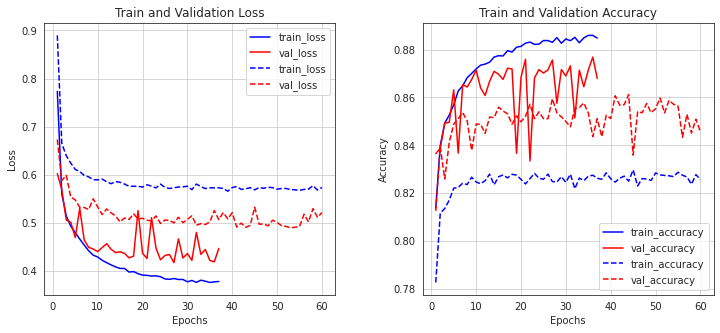

In [ ]:
diff_history(history4, history5)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8365


[0.5438235998153687, 0.8364999890327454]

###### 드롭아웃-2
- dense-layer에(중간층) 50%의 드롭아웃 적용
- L2규제 빼볼 것(같이 병행해도 되는데, 성능하락해서 점검용으로)

In [ ]:
from tensorflow.keras import models, layers, regularizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512,
                       activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout은 별도 레이어로 추가
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history5_2 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5859 - accuracy: 0.7918 - val_loss: 0.4344 - val_accuracy: 0.8471

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4569 - accuracy: 0.8336 - val_loss: 0.4076 - val_accuracy: 0.8466

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4195 - accuracy: 0.8449 - val_loss: 0.4023 - val_accuracy: 0.8531

Epoch 00003: val_loss did not improve from 0.31845
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3955 - accuracy: 0.8538 - val_loss: 0.3697 - val_accuracy: 0.8694

Epoch 00004: val_loss did not improve from 0.31845
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3822 - accuracy: 0.8579 - val_loss: 0.3569 - val_accuracy: 0.8739

Epoch 00005: val_loss did not improve from 0.31845
Epoch 6/60
1313/1313

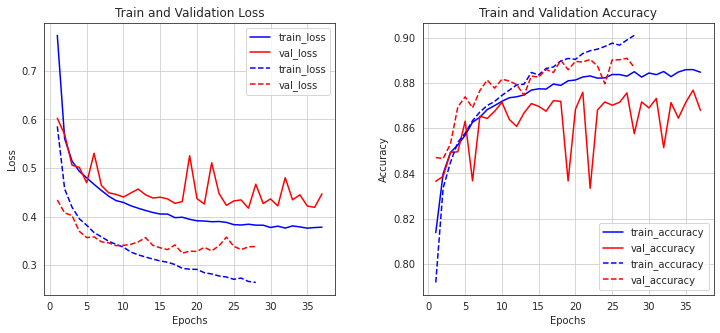

In [ ]:
diff_history(history4, history5_2)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8785


[0.3462977409362793, 0.8784999847412109]

##### 배치 정규화

In [ ]:
from tensorflow.keras import models, layers, regularizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape = (784,)))
model.add(layers.Dense(512,
                      activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5092 - accuracy: 0.8196 - val_loss: 0.4703 - val_accuracy: 0.8377

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4232 - accuracy: 0.8490 - val_loss: 0.4394 - val_accuracy: 0.8402

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3923 - accuracy: 0.8589 - val_loss: 0.4891 - val_accuracy: 0.8206

Epoch 00003: val_loss did not improve from 0.31845
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3654 - accuracy: 0.8686 - val_loss: 0.3814 - val_accuracy: 0.8642

Epoch 00004: val_loss did not improve from 0.31845
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3488 - accuracy: 0.8711 - val_loss: 0.3661 - val_accuracy: 0.8733

Epoch 00005: val_loss did not improve from 0.31845
Epoch 6/60
1313/1313

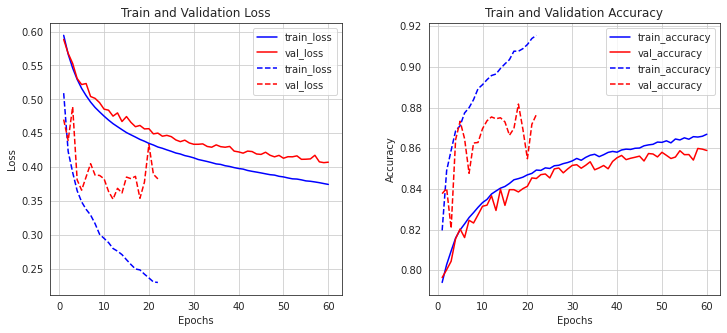

In [ ]:
diff_history(history, history6)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8670


[0.37451428174972534, 0.8669999837875366]

##### 배치정규화 + Dropout

In [ ]:
from tensorflow.keras import models, layers, regularizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape = (784,)))
model.add(layers.Dense(512,
                      activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5983 - accuracy: 0.7891 - val_loss: 0.4620 - val_accuracy: 0.8309

Epoch 00001: val_loss did not improve from 0.31845
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4901 - accuracy: 0.8262 - val_loss: 0.4275 - val_accuracy: 0.8477

Epoch 00002: val_loss did not improve from 0.31845
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4623 - accuracy: 0.8353 - val_loss: 0.4719 - val_accuracy: 0.8304

Epoch 00003: val_loss did not improve from 0.31845
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4472 - accuracy: 0.8396 - val_loss: 0.3915 - val_accuracy: 0.8593

Epoch 00004: val_loss did not improve from 0.31845
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4303 - accuracy: 0.8454 - val_loss: 0.4382 - val_accuracy: 0.8335

Epoch 00005: val_loss did not improve from 0.31845
Epoch 6/60
1313/1313


Epoch 00042: val_loss did not improve from 0.31845
Epoch 43/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3130 - accuracy: 0.8833 - val_loss: 0.3428 - val_accuracy: 0.8801

Epoch 00043: val_loss did not improve from 0.31845
Epoch 44/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3094 - accuracy: 0.8844 - val_loss: 0.3354 - val_accuracy: 0.8839

Epoch 00044: val_loss did not improve from 0.31845
Epoch 45/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3092 - accuracy: 0.8848 - val_loss: 0.3393 - val_accuracy: 0.8836

Epoch 00045: val_loss did not improve from 0.31845
Epoch 46/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3082 - accuracy: 0.8847 - val_loss: 0.3310 - val_accuracy: 0.8851

Epoch 00046: val_loss did not improve from 0.31845
Epoch 47/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3053 - accuracy: 0.8868 - val_loss: 0.3324 - val_accuracy: 0.8869

Epoch 00047: v

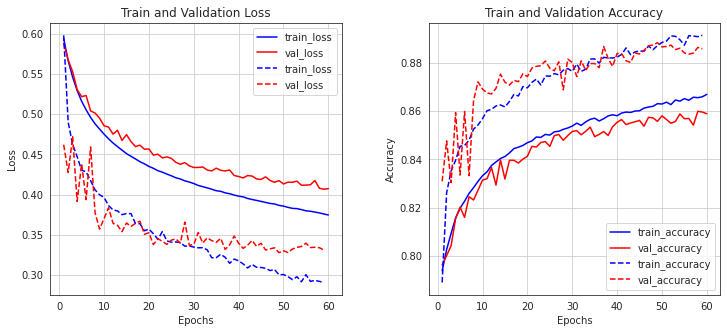

In [ ]:
diff_history(history, history7)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8753


[0.35396507382392883, 0.8752999901771545]

##### 모델 결과 분석
- 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화
- 최적화한 모델의 분류 결과를 클래스별로 성능 지표 살펴보기
- 모델의 결과를 혼동 행렬을 통해 시각화

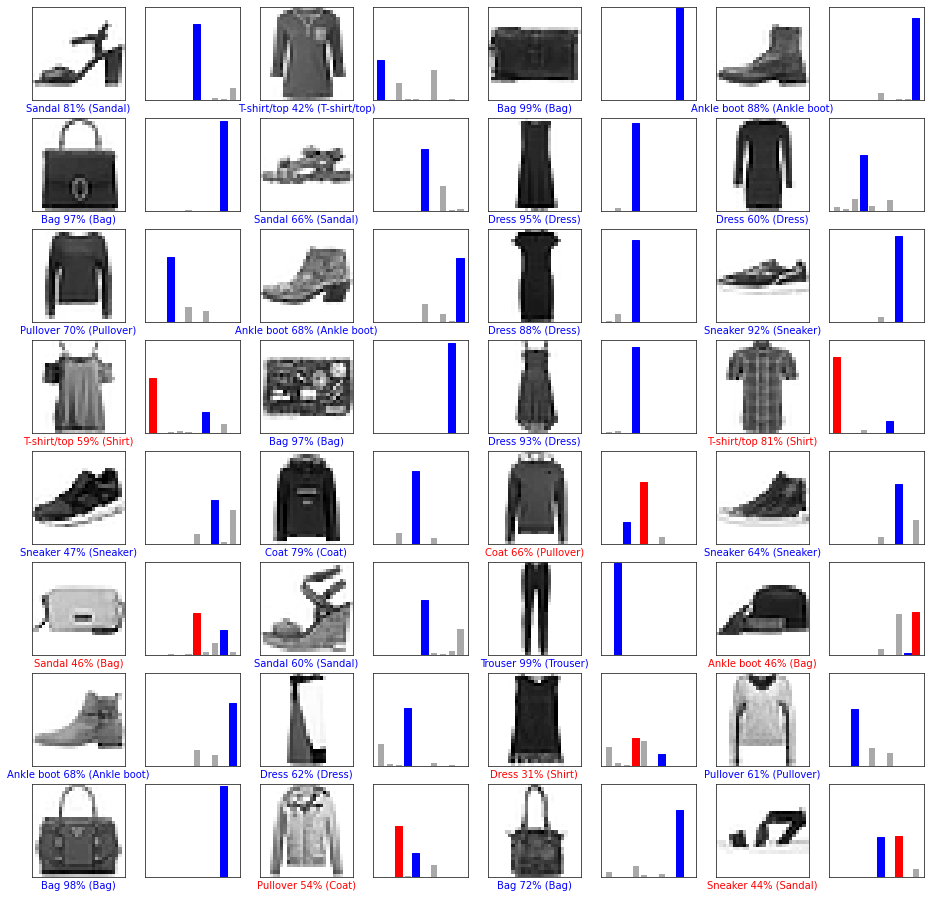

In [ ]:
# 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화
# 앞에서 정의한 함수 사용
# plot_image, plot_class

num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [ ]:
# 최적화한 모델의 분류 결과를 클래스별로 성능 지표를 살펴봅니다.
# 직접 코드를 입력해보세요

from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis = -1),
                            np.argmax(pred_ys, axis = -1),
                            target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.82      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.71      0.59      0.64      1000
       Dress       0.79      0.81      0.80      1000
        Coat       0.59      0.81      0.68      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.48      0.29      0.36      1000
     Sneaker       0.85      0.85      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.87      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



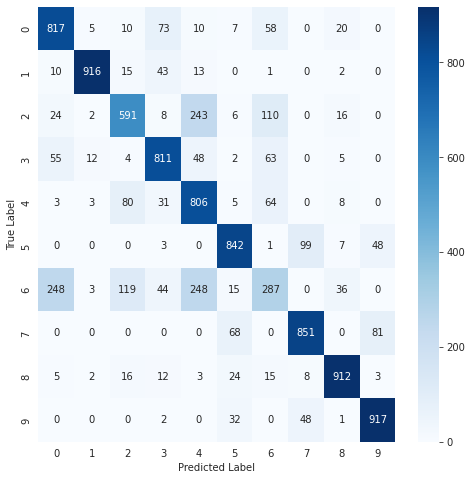

In [ ]:
# 모델의 결과를 혼동 행렬를 통해서 시각화
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 노드12 : 딥러닝 프로젝트

#### 노드 12-01 boston 주택가격예측
- 성능 실험(Adam, Batch-normalization 하면 최적이었음)
  - 초기-1 (loss: 78.2046 - mae: 6.8198 - val_loss: 173.9050 - val_mae: 12.2932)
    - 초기 optimizer = 'rmsprop', epochs = 60, loss = mse, activation = 'relu'
    - 평가결과 : loss: 172.4117 - mae: 11.9847
    - 데이터 숫자가 너무 적어서, validation-set을 두는게 역효과일 수도 있음
  - 실험-1 (loss: 32.3940 - mae: 4.0535 - val_loss: 27.5258 - val_mae: 3.9996)
    - optimizer = 'Adam으로 변경'
    - 평가결과 : loss: 35.8825 - mae: 4.2499, (optimizer는 adam으로, 이 문제의 경우, overfit은 크지 않음)
  - 실험-2 (loss: 31.7750 - mae: 4.2895 - val_loss: 38.7557 - val_mae: 4.2284)
    - 중간 dense를 64->32로 변경
    - 평가결과 : loss: 43.1682 - mae: 4.8651
  - 실험-3 (loss: 51.2027 - mae: 5.5857 - val_loss: 72.3266 - val_mae: 6.9906)
    - 중간 dense를 128로 변경
    - 평가결과 : loss: 97.2862 - mae: 8.0668
  - 실험-4(loss: 29.0289 - mae: 3.8701 - val_loss: 26.5042 - val_mae: 3.6715)
    - 중간 dense는 64로, batch-normalization만 적용
    - 평가결과 :loss: 31.5584 - mae: 3.9226
  - 실험-5(loss: 32.6177 - mae: 4.2556 - val_loss: 25.2953 - val_mae: 3.3454)
    - 중간 dense는 64, batch-normalization후 drop-out, 20% 적용
    - 평가결과 : loss: 39.6815 - mae: 4.1850

##### 데이터 로드, 전처리

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [ ]:
tmp = boston_housing.load_data()

In [ ]:
type(tmp)

tuple

In [ ]:
tmp[1]

(array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.72500e+01, 2.90500e+01],
        [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
         3.94950e+02, 1.62100e+01],
        [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
         3.96900e+02, 9.74000e+00],
        ...,
        [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.89610e+02, 1.92000e+00],
        [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
         3.91700e+02, 9.71000e+00],
        [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.40160e+02, 9.81000e+00]]),
 array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
        14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
        20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
        23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
        32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
   

In [ ]:
train_labels[:5] # 가격대 확인!

array([15.2, 42.3, 50. , 21.1, 17.7])

##### 모델 구성 및 컴파일

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_pj1 = model.fit(x_train_partial, y_train_partial,
                        epochs = 60,
                        validation_data = (x_val, y_val))

Epoch 1/60
11/11 [==============================] - 0s 12ms/step - loss: 314.7943 - mae: 12.1073 - val_loss: 147.0839 - val_mae: 10.7713
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 94.2736 - mae: 7.3113 - val_loss: 289.7469 - val_mae: 15.6115
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 127.6840 - mae: 8.6866 - val_loss: 49.8003 - val_mae: 5.8115
Epoch 4/60
11/11 [==============================] - 0s 4ms/step - loss: 168.4180 - mae: 10.3096 - val_loss: 104.5219 - val_mae: 8.6494
Epoch 5/60
11/11 [==============================] - 0s 4ms/step - loss: 124.4874 - mae: 8.2431 - val_loss: 590.0675 - val_mae: 22.5835
Epoch 6/60
11/11 [==============================] - 0s 4ms/step - loss: 97.6629 - mae: 6.8408 - val_loss: 109.5532 - val_mae: 9.3934
Epoch 7/60
11/11 [==============================] - 0s 4ms/step - loss: 135.2857 - mae: 9.6678 - val_loss: 592.2241 - val_mae: 23.4500
Epoch 8/60
11/11 [==============================] - 0s 4ms

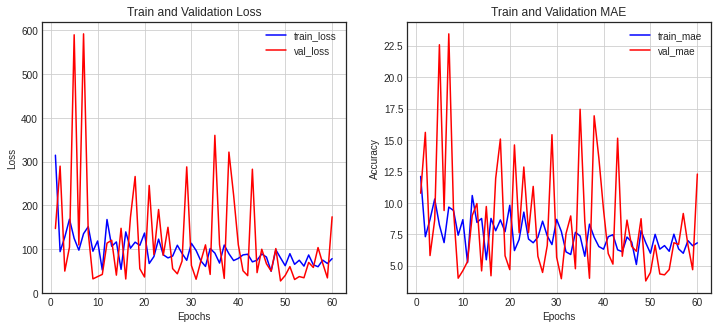

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history_pj1.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 172.4117 - mae: 11.9847


[172.41171264648438, 11.984670639038086]

##### 변경해보기

###### 변경(optimizer)
- rmsprop에서 adam으로 optimizer변경

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_pj1_2 = model.fit(x_train_partial, y_train_partial,
                          epochs = 60,
                          validation_data = (x_val, y_val))

Epoch 1/60
11/11 [==============================] - 0s 12ms/step - loss: 269.8084 - mae: 12.7274 - val_loss: 269.6360 - val_mae: 14.3690
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 152.9437 - mae: 9.3398 - val_loss: 89.6070 - val_mae: 7.0019
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 126.1988 - mae: 8.7217 - val_loss: 69.3272 - val_mae: 6.5347
Epoch 4/60
11/11 [==============================] - 0s 4ms/step - loss: 86.8688 - mae: 6.6728 - val_loss: 67.0573 - val_mae: 6.4228
Epoch 5/60
11/11 [==============================] - 0s 4ms/step - loss: 84.0381 - mae: 6.5057 - val_loss: 61.2949 - val_mae: 6.0431
Epoch 6/60
11/11 [==============================] - 0s 4ms/step - loss: 80.8637 - mae: 6.3862 - val_loss: 59.4101 - val_mae: 5.9763
Epoch 7/60
11/11 [==============================] - 0s 4ms/step - loss: 87.1576 - mae: 6.9639 - val_loss: 55.6294 - val_mae: 5.7742
Epoch 8/60
11/11 [==============================] - 0s 4ms/step - los

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 35.8825 - mae: 4.2499


[35.88251876831055, 4.249941825866699]

###### 파라미터 수 조정(줄이기)
- 신경망 중간층 64개에서 32개로
- optimizer는 adam으로 고정

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

history_pj1_3 = model.fit(x_train_partial, y_train_partial,
                          epochs = 60,
                          validation_data = (x_val, y_val))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
11/11 [==============================] - 0s 12ms/step - loss: 144.7269 - mae: 9.0868 - val_loss: 99.2280 - val_mae: 8.1685
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 90.8647 - mae: 7.0768 - val_loss: 57.3284 - val_mae: 5.5426
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 77.9083 - mae: 6.3508 - val_loss: 52.6508 -

11/11 [==============================] - 0s 4ms/step - loss: 33.7144 - mae: 4.3785 - val_loss: 29.2174 - val_mae: 3.8904
Epoch 58/60
11/11 [==============================] - 0s 4ms/step - loss: 30.0719 - mae: 4.0209 - val_loss: 32.9445 - val_mae: 4.2498
Epoch 59/60
11/11 [==============================] - 0s 4ms/step - loss: 28.9905 - mae: 4.0083 - val_loss: 30.9765 - val_mae: 4.0076
Epoch 60/60
11/11 [==============================] - 0s 4ms/step - loss: 31.7750 - mae: 4.2895 - val_loss: 38.7557 - val_mae: 4.2284


In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 43.1682 - mae: 4.8651


[43.168209075927734, 4.865082740783691]

###### 파라미터 수 늘리기
- 중간 Dense layer 64->128
- 성능 도리어 나빠짐, 과적합

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

history_pj1_4 = model.fit(x_train_partial, y_train_partial,
                          epochs = 60,
                          validation_data = (x_val, y_val))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 129       
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
11/11 [==============================] - 0s 12ms/step - loss: 1715.1970 - mae: 32.3949 - val_loss: 62.2796 - val_mae: 5.3484
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 219.8245 - mae: 10.6727 - val_loss: 236.3014 - val_mae: 13.7466
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 227.9770 - mae: 13.0791 - val_loss: 8

Epoch 57/60
11/11 [==============================] - 0s 4ms/step - loss: 35.8578 - mae: 4.3015 - val_loss: 28.4065 - val_mae: 4.0863
Epoch 58/60
11/11 [==============================] - 0s 4ms/step - loss: 35.8423 - mae: 4.3149 - val_loss: 37.8967 - val_mae: 5.0905
Epoch 59/60
11/11 [==============================] - 0s 4ms/step - loss: 36.9294 - mae: 4.6213 - val_loss: 30.9455 - val_mae: 3.9586
Epoch 60/60
11/11 [==============================] - 0s 4ms/step - loss: 51.2027 - mae: 5.5857 - val_loss: 72.3266 - val_mae: 6.9906


In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 97.2862 - mae: 8.0668


[97.28616333007812, 8.066768646240234]

###### 배치-normalization
- Dense는 64로 원복, 배치-normalization만 적용

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

history_pj1_5 = model.fit(x_train_partial, y_train_partial,
                          epochs = 60,
                          validation_data = (x_val, y_val))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 5,377
Trainable params: 5,249
Non-trainable params: 128
_________________________________________________________________
Epoch 1/60
11/11 [==============================] - 1s 14ms/step - loss: 612.0353 - mae: 22.8161 - val_loss: 318.4857 - val_mae: 16.5845
Epoch 2/60
11/11 [==============================] - 0s 5ms/step - loss: 591.6697 - mae: 22.6932 - val_loss: 48

Epoch 55/60
11/11 [==============================] - 0s 4ms/step - loss: 28.3335 - mae: 3.7591 - val_loss: 52.3982 - val_mae: 5.8566
Epoch 56/60
11/11 [==============================] - 0s 4ms/step - loss: 28.7531 - mae: 3.7351 - val_loss: 74.7033 - val_mae: 7.3872
Epoch 57/60
11/11 [==============================] - 0s 5ms/step - loss: 26.1230 - mae: 3.6845 - val_loss: 43.1321 - val_mae: 5.1870
Epoch 58/60
11/11 [==============================] - 0s 4ms/step - loss: 26.9271 - mae: 3.6884 - val_loss: 32.0762 - val_mae: 4.1055
Epoch 59/60
11/11 [==============================] - 0s 4ms/step - loss: 27.4930 - mae: 3.9849 - val_loss: 36.6962 - val_mae: 4.6121
Epoch 60/60
11/11 [==============================] - 0s 4ms/step - loss: 29.0289 - mae: 3.8701 - val_loss: 26.5042 - val_mae: 3.6715


In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 31.5584 - mae: 3.9226


[31.558414459228516, 3.922567367553711]

In [ ]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# 원래 train_data: 404개 (나중에 validation 시각화 하는 부분 있음!)
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

model.summary()

history_pj1_6 = model.fit(x_train_partial, y_train_partial,
                          epochs = 60,
                          validation_data = (x_val, y_val))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 65        
Total params: 5,377
Trainable params: 5,249
Non-trainable params: 128
_________________________________________________________________
Epoch 1/60
11/11 [==============================] - 1s 14ms/step - loss: 605.2740 - mae: 22.8057 - val_loss: 1125.4

11/11 [==============================] - 0s 4ms/step - loss: 37.6230 - mae: 4.1745 - val_loss: 33.8616 - val_mae: 4.1145
Epoch 55/60
11/11 [==============================] - 0s 5ms/step - loss: 38.8355 - mae: 4.6183 - val_loss: 49.0644 - val_mae: 5.4739
Epoch 56/60
11/11 [==============================] - 0s 4ms/step - loss: 37.2340 - mae: 4.2124 - val_loss: 27.7898 - val_mae: 3.5835
Epoch 57/60
11/11 [==============================] - 0s 4ms/step - loss: 36.9114 - mae: 4.3478 - val_loss: 36.6537 - val_mae: 4.5881
Epoch 58/60
11/11 [==============================] - 0s 4ms/step - loss: 35.9262 - mae: 4.1916 - val_loss: 27.2574 - val_mae: 3.9268
Epoch 59/60
11/11 [==============================] - 0s 4ms/step - loss: 36.0758 - mae: 4.2653 - val_loss: 24.6442 - val_mae: 3.6382
Epoch 60/60
11/11 [==============================] - 0s 4ms/step - loss: 37.9101 - mae: 4.6518 - val_loss: 33.4894 - val_mae: 4.1299


In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 46.4612 - mae: 4.8499


[46.46116638183594, 4.849935054779053]

#### 노드 12-02 Reuters 딥러닝모델
- 성능 실험
  - 실험-1 (accuracy: 0.9598 - loss: 0.1419 - val_accuracy: 0.8112 - val_loss: 1.2359)
    - 초기 optimizer = 'rmsprop', epochs = 60, loss = accuracy, activation = 'relu', batch_normal, drop_out=0.5
    - 평가결과 : accuracy: 0.8056 - loss: 1.3266 (overfitting문제)
  - 실험-2 (accuracy: 0.9339 - loss: 0.2682 - val_accuracy: 0.8090 - val_loss: 1.1223
)
    - callback, earlystopping 선택
    - 평가결과 : accuracy: 0.7930 - loss: 0.9762(16회 stop)
  - 실험-3 (accuracy: 0.9241 - loss: 0.2835 - val_accuracy: 0.8197 - val_loss: 1.1810)
    - optimizer = 'adam', 첫layer 128->64, 두 번째 layer 64->32
    - 평가결과 : accuracy: 0.7901 - loss: 1.1148 (31회stop)
  - 실험-4(accuracy: 0.8624 - loss: 0.7675 - val_accuracy: 0.8152 - val_loss: 1.2282)
    - 평가결과 : accuracy: 0.7820 - loss: 1.2915(23회 stop)

##### 데이터 불러오기, 전처리

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# train에서 validation도 따로 나누기
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim), dtype='float32')
    for i, d in enumerate(data):
        for word_index in d:
            word_index = int(word_index)
            if word_index < dim:
                results[i, word_index] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = to_categorical(train_labels).astype('float32')
y_val = to_categorical(val_labels).astype('float32')
y_test = to_categorical(test_labels).astype('float32')

##### 모델 구성 및 컴파일

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))

# 첫 번째 은닉층
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층 (Reuters는 다중 클래스 분류 -> 클래스 수는 46)
model.add(layers.Dense(46, activation='softmax'))

# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### 모델 학습

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의
check_point_cb = ModelCheckpoint(
    filepath='reuters_model.keras',       # 최신 Keras 저장 포맷
    monitor='val_loss',                   # 검증 손실 기준
    mode='min',                           # 낮을수록 좋음
    save_best_only=True,                  # 가장 좋은 성능만 저장
    verbose=1                             # 저장 로그 출력
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_pj2_1 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3449 - loss: 3.0933
Epoch 1: val_loss improved from inf to 1.58623, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3457 - loss: 3.0896 - val_accuracy: 0.7217 - val_loss: 1.5862
Epoch 2/60
197/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7069 - loss: 1.3656
Epoch 2: val_loss improved from 1.58623 to 1.09001, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7080 - loss: 1.3600 - val_accuracy: 0.7685 - val_loss: 1.0900
Epoch 3/60
194/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.9724
Epoch 3: val_loss improved from 1.09001 to 1.02315, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7769 - loss: 0.9736 - val_accuracy: 0.7872 - val_loss: 1.0232
Epoch 4/60
196/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8126 - loss: 0.8209
Epoch 4: val_loss improved from 1.02315 to 

In [ ]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0050 - loss: 3.8653


[3.8644816875457764, 0.005342831835150719]

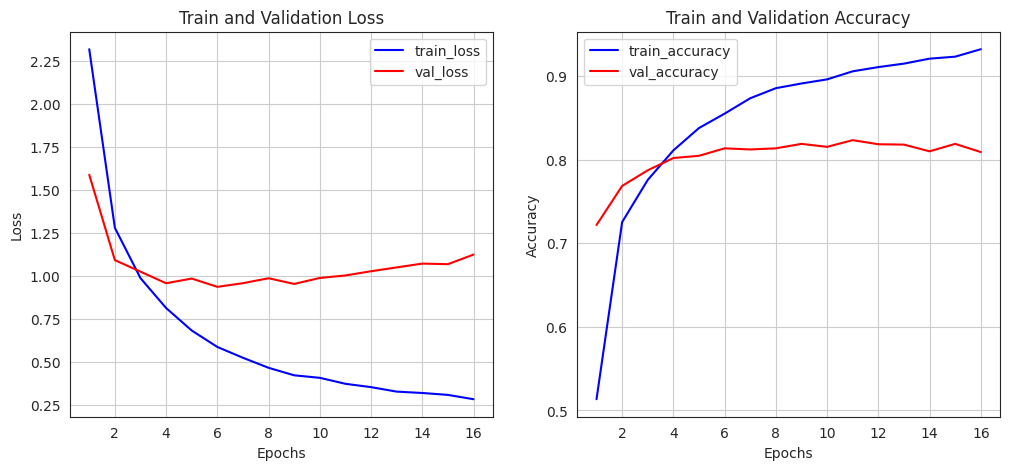

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

history_dict = history_pj2_1.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 모델 평가 및 예측

In [ ]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7930 - loss: 0.9762


[0.9955710172653198, 0.7853962779045105]

##### 성능향상 실험-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# train에서 validation도 따로 나누기
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim), dtype='float32')
    for i, d in enumerate(data):
        for word_index in d:
            word_index = int(word_index)
            if word_index < dim:
                results[i, word_index] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = to_categorical(train_labels).astype('float32')
y_val = to_categorical(val_labels).astype('float32')
y_test = to_categorical(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))

# 첫 번째 은닉층
model.add(layers.Dense(64, activation='relu')) # 128-> 64로
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(32, activation='relu')) # 64 -> 32로
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층 (Reuters는 다중 클래스 분류 -> 클래스 수는 46)
model.add(layers.Dense(46, activation='softmax'))

# 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), # 기본값보다 낮게 학습률 설정
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의
check_point_cb = ModelCheckpoint(
    filepath='reuters_model.keras',       # 최신 Keras 저장 포맷
    monitor='val_loss',                   # 검증 손실 기준
    mode='min',                           # 낮을수록 좋음
    save_best_only=True,                  # 가장 좋은 성능만 저장
    verbose=1                             # 저장 로그 출력
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_pj2_2 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2236 - loss: 3.5927
Epoch 1: val_loss improved from inf to 2.53343, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2243 - loss: 3.5898 - val_accuracy: 0.6331 - val_loss: 2.5334
Epoch 2/60
199/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 1.9828
Epoch 2: val_loss improved from 2.53343 to 1.53408, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5907 - loss: 1.9774 - val_accuracy: 0.7137 - val_loss: 1.5341
Epoch 3/60
199/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 1.5300
Epoch 3: val_loss improved from 1.53408 to 1.31770, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6761 - loss: 1.5294 - val_accuracy: 0.7222 - val_loss: 1.3177
Epoch 4/60
204/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 1.3746
Epoch 4: val_loss improved from 1.31770 to 1

In [ ]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 1.1148


[1.1155813932418823, 0.7867319583892822]

##### 성능향상 실험-2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# train에서 validation도 따로 나누기
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim), dtype='float32')
    for i, d in enumerate(data):
        for word_index in d:
            word_index = int(word_index)
            if word_index < dim:
                results[i, word_index] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = to_categorical(train_labels).astype('float32')
y_val = to_categorical(val_labels).astype('float32')
y_test = to_categorical(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))

# 첫 번째 은닉층
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # 128-> 64로
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001), activation='relu')) # 64 -> 32로
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층 (Reuters는 다중 클래스 분류 -> 클래스 수는 46)
model.add(layers.Dense(46, activation='softmax'))

# 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), # 기본값보다 낮게 학습률 설정
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의
check_point_cb = ModelCheckpoint(
    filepath='reuters_model.keras',       # 최신 Keras 저장 포맷
    monitor='val_loss',                   # 검증 손실 기준
    mode='min',                           # 낮을수록 좋음
    save_best_only=True,                  # 가장 좋은 성능만 저장
    verbose=1                             # 저장 로그 출력
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_pj2_3 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2077 - loss: 3.6420
Epoch 1: val_loss improved from inf to 2.82976, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2083 - loss: 3.6394 - val_accuracy: 0.6362 - val_loss: 2.8298
Epoch 2/60
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6042 - loss: 2.0556
Epoch 2: val_loss improved from 2.82976 to 1.61661, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6045 - loss: 2.0541 - val_accuracy: 0.7173 - val_loss: 1.6166
Epoch 3/60
206/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 1.5995
Epoch 3: val_loss improved from 1.61661 to 1.40381, saving model to reuters_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6913 - loss: 1.5997 - val_accuracy: 0.7360 - val_loss: 1.4038
Epoch 4/60
201/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 1.4406
Epoch 4: val_loss improved from 1.40381 to 

In [ ]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 1.2915


[1.2965278625488281, 0.7751558423042297]

#### 노드 12-03 CIFAR-10 딥러닝모델
- 성능 실험
  - 초기(accuracy: 0.3505 - loss: 1.7932 - val_accuracy: 0.4030 - val_loss: 1.6532)
    - 설정 : optimizer(adam), 은닉층1(256, dropout=0.5), 은닉층2(128, dropout= 0.5), 콜백
    - 결과 : accuracy: 0.4119 - loss: 1.6457 (60회)
  - 실험-1(accuracy: 0.3608 - loss: 1.7821 - val_accuracy: 0.3895 - val_loss: 1.6787)
    - 설정 : optimizer(rmsprop), 은닉층2(128, dropout=0.3) 으로 변경
    - 결과 : accuracy: 0.4116 - loss: 1.6428
  - 실험-2(loss: 1.6723 - accuracy: 0.4058 - val_loss: 1.5786 - val_accuracy: 0.4487)
    - 설정 : optimizer(rmsprop), 은닉층1(2048, dropout=0.5), 은닉층2(1024, dropout = 0.5),    
    은닉층3(512, dropout=0.5), 'sparse_categorical_crossentropy'
    - 결과 : loss: 1.4973 - accuracy: 0.4747 (26회)
    - 참고 : colab 끊겨서, LMS에서 실험
  - 실험-3(accuracy: 0.4298 - loss: 1.5877 - val_accuracy: 0.4699 - val_loss: 1.4905)
    - 설정 : optimizer(adam으로 변경)
    - 결과 : accuracy: 0.4807 - loss: 1.4466 (53회)
    - 참고 : colab, LMS 접속 문제로 kaggle에서 실험
- MLP로는 컬러 이미지 데이터를 다루는 것에 한계가 있음
  - MLP로 처리하기 위해서는 32 by 32 by R/G/B(3개 채널)의 정보를 32 곱하기 32 곱하기 3으로 3072개로 이뤄진 벡터로 정보를 왜곡하게 됨

##### 데이터로드 및 전처리

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

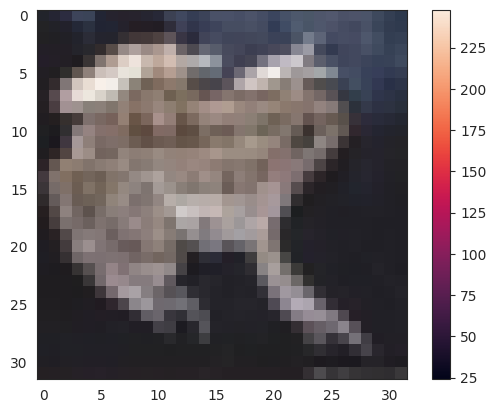

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
# plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

##### 모델 구성 및 컴파일

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

from tensorflow.keras import models, layers

# 모델 구성 시작
model = models.Sequential()
# 입력층 (flatten된 이미지 데이터)
model.add(layers.Input(shape=(3072,)))

# 첫 번째 은닉층
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층 (CIFAR-10은 10개의 클래스)
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,410 (3.14 MB)

 Trainable params: 821,642 (3.13 MB)

 Non-trainable params: 768 (3.00 KB)

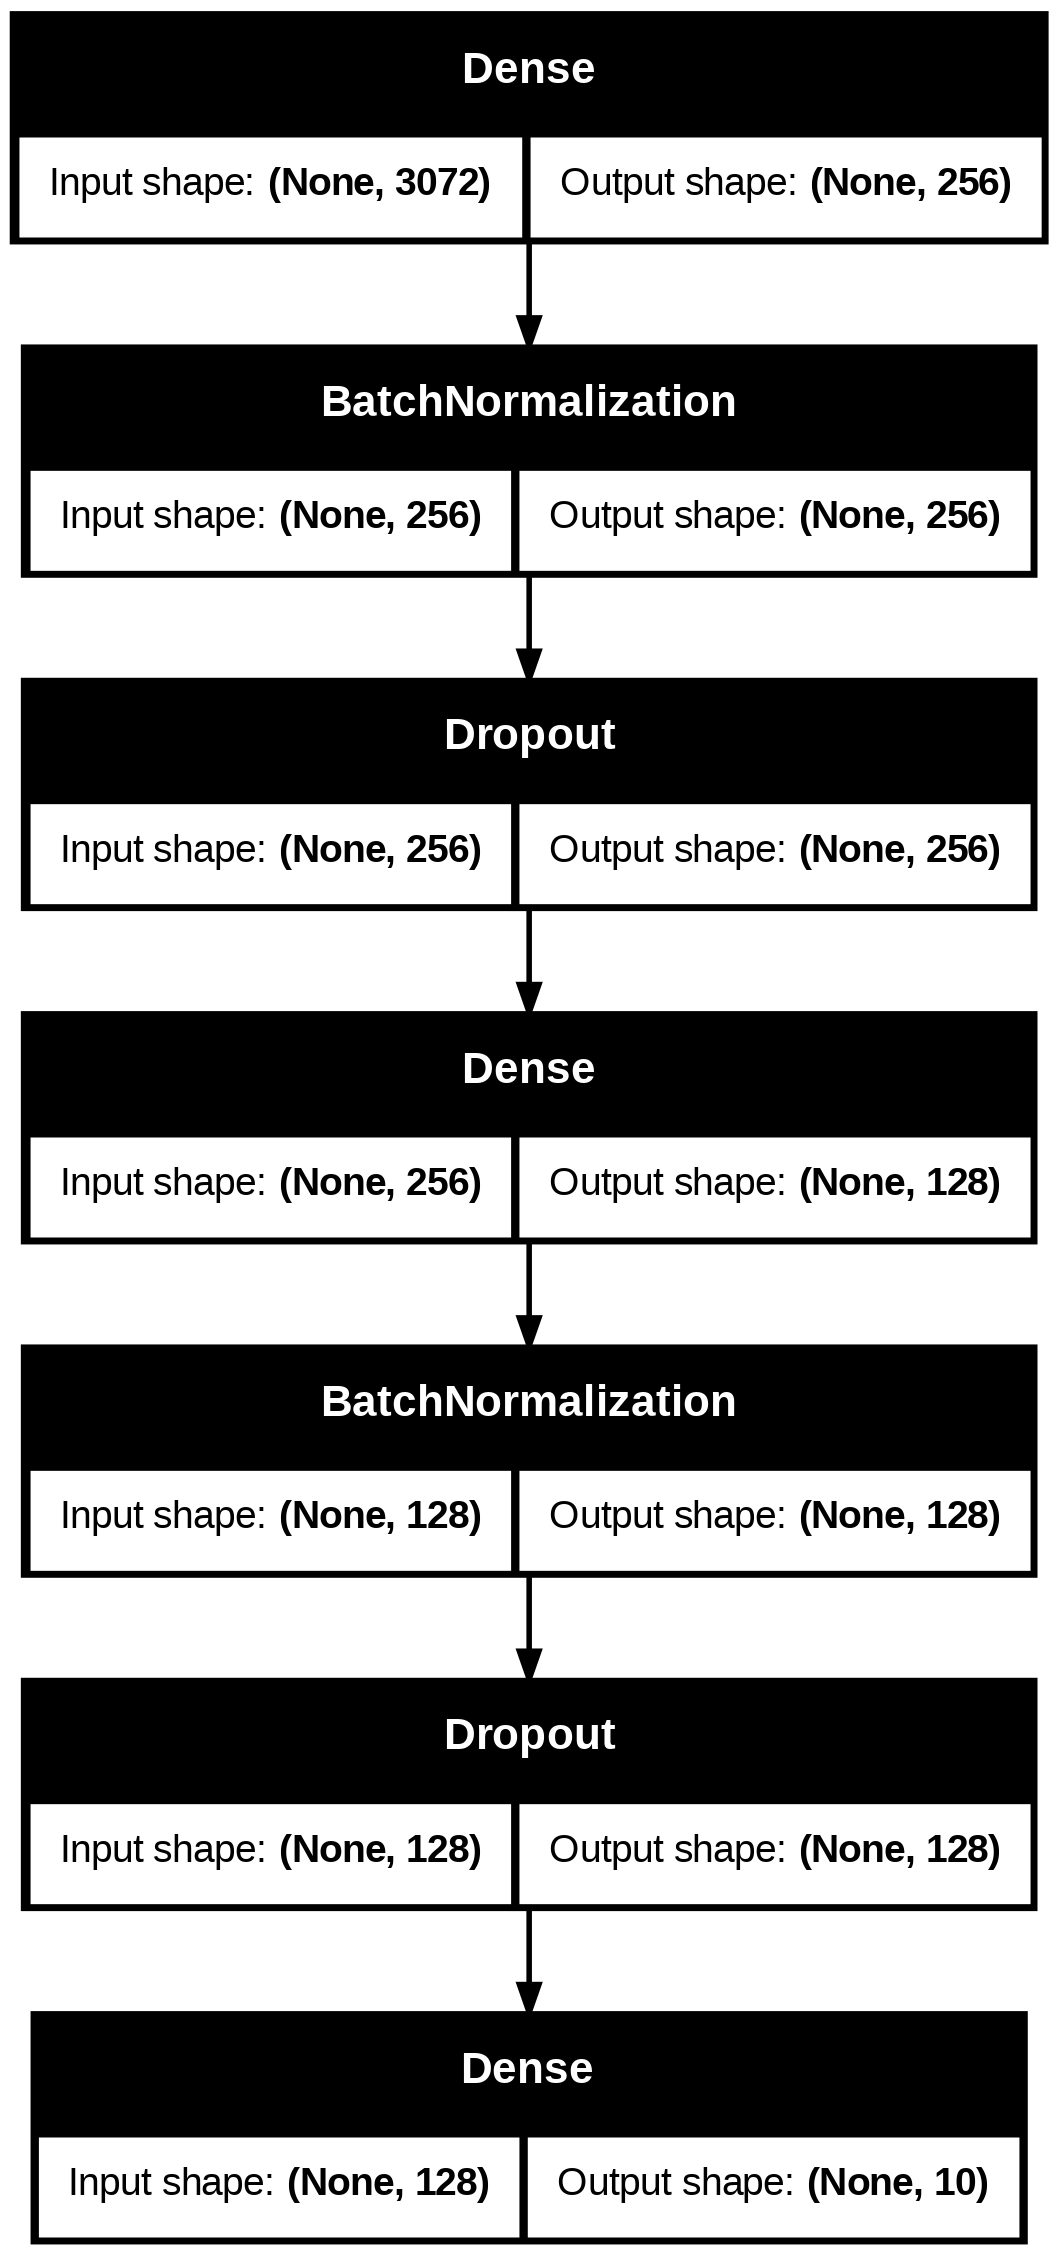

In [ ]:
utils.plot_model(model, show_shapes=True)

##### 모델 학습

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의(ModelCheckPoint, EarlyStopping)
check_point_cb = ModelCheckpoint(
    filepath = 'cifar10_model.keras',
    monitor = 'val-loss',
    mode = 'min',
    save_best_only = True,
    verbose = 1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_pj3_1 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2256 - loss: 2.4488 - val_accuracy: 0.2997 - val_loss: 1.8931
Epoch 2/60
  64/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3052 - loss: 1.9478

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val-loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3088 - loss: 1.9165 - val_accuracy: 0.3468 - val_loss: 1.8013
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3133 - loss: 1.9023 - val_accuracy: 0.3540 - val_loss: 1.7769
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3156 - loss: 1.8966 - val_accuracy: 0.3131 - val_loss: 1.9037
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3134 - loss: 1.9045 - val_accuracy: 0.3638 - val_loss: 1.7663
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3242 - loss: 1.8792 - val_accuracy: 0.3551 - val_loss: 1.7952
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3180 - loss: 1.8893 - val_accuracy: 0.3622 - val_loss: 1.7679
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3183 - loss: 1.8771 - val_accuracy: 0.3777 - val_loss: 1.7268
Epoch 9/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3248 - loss: 1.8609 - val_accurac

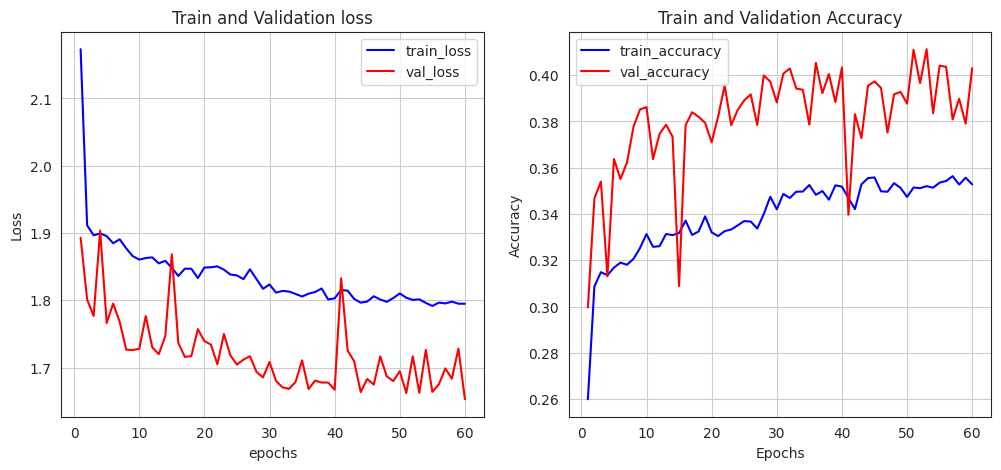

In [ ]:
history_dict = history_pj3_1.history # accuracy, loss, val_accuracy, val_loss 의 history(epoch=50)

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 모델 평가 및 예측

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4119 - loss: 1.6457


[1.6525957584381104, 0.40700000524520874]

##### 성능향상 실험-1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
from tensorflow.keras import models, layers

# 모델 구성 시작
model = models.Sequential()
# 입력층 (flatten된 이미지 데이터)
model.add(layers.Input(shape=(3072,)))

# 첫 번째 은닉층
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# 출력층 (CIFAR-10은 10개의 클래스)
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의(ModelCheckPoint, EarlyStopping)
check_point_cb = ModelCheckpoint(
    filepath = 'cifar10_model.keras',
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    verbose = 1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_pj3_3 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2451 - loss: 2.2793 - val_accuracy: 0.3352 - val_loss: 1.8360
Epoch 2/60
  41/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3297 - loss: 1.8762

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val-loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3255 - loss: 1.8759 - val_accuracy: 0.3348 - val_loss: 1.8241
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3348 - loss: 1.8552 - val_accuracy: 0.3742 - val_loss: 1.7340
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3305 - loss: 1.8584 - val_accuracy: 0.3697 - val_loss: 1.7427
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3291 - loss: 1.8569 - val_accuracy: 0.3815 - val_loss: 1.7089
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3365 - loss: 1.8463 - val_accuracy: 0.3871 - val_loss: 1.7125
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3275 - loss: 1.8584 - val_accuracy: 0.3789 - val_loss: 1.7294
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3199 - loss: 1.8762 - val_accuracy: 0.3650 - val_loss: 1.7792
Epoch 9/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3273 - loss: 1.8585 - val_accurac

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4116 - loss: 1.6428


[1.6495646238327026, 0.4108999967575073]

##### 성능향상 실험-2
- colab 끊겨서 LMS에서 실험함

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
from tensorflow.keras import models, layers

# 모델 구성 시작
model = models.Sequential()
# 입력층 (flatten된 이미지 데이터)
model.add(layers.Input(shape=(3072,)))

# 첫 번째 은닉층
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 은닉층
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 세 번째 은닉층
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층 (CIFAR-10은 10개의 클래스)
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

#### 참고 CNN 사용해보기
- 성능평가
  - 초기(loss: 0.5970 - accuracy: 0.7773 - val_loss: 1.0284 - val_accuracy: 0.6982)
    - 설정
      - layers.Conv2D(32,(3,3)),MaxPooling2D(2,2)
      - layers.Conv2D(64,(3,3)), MaxPooling2D(2,2)
      - Flatten 후 Dense(128), dropout=0.5, optimizer = 'adam',loss='sparse_categorical_crossentropy'
    - 결과 : accuracy: 0.7042 - loss: 0.8940(23회차)
  - 실험-1(accuracy: 0.6700 - loss: 0.9341 - val_accuracy: 0.7262 - val_loss: 0.9388)
    - 설정
      - 데이터 증강, input 레이어 바로 뒤에!
      - layer.Conv2D(64,(3,3)),MaxPooling2D(2,2) * 2, 배치정규화
      - layer.Conv2D(128,(3,3)), MaxPooling2D(2,2) *2, 배치정규화
    - 결과 : accuracy: 0.8025 - loss: 0.7393(41회차종결, 31회차 가중치 복귀)
  - 실험-2(accuracy: 0.8198 - loss: 0.5284 - val_accuracy: 0.8148 - val_loss: 0.5552 - learning_rate: 2.5600e-09)
    - 설정
      - 학습률(Learning Rate) 스케줄러
      - 분류기(Classifier) 부분 강화
      - optimizer변경(optimizer=optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)
    - 결과 : accuracy: 0.8072 - loss: 0.5742
  - 실험-3(accuracy: 0.8679 - loss: 0.3846 - val_accuracy: 0.9110 - val_loss: 0.2567 - learning_rate: 1.0000e-05)
    - 설정(전이학습 EfficientNetB0)
      - 전이학습의 경우 자체적으로 정규화 하므로, 255나눌 필요 없음!(모델 마다 체크)
      - Freeze(동결)하고 다시 훈련시키는 과정
      - 초기(1단계) epoch 50, 미세학습(2단계) epoch 30
    - 결과 : accuracy: 0.9049 - loss: 0.2759
    - 특징 : 커스텀 CNN 대비 epoch당 3-4배 정도 시간이 걸림(약 1시간?)
  - 실험-4(accuracy: 0.9133 - loss: 0.2614 - val_accuracy: 0.9284 - val_loss: 0.2245 - learning_rate: 2.0000e-06)
    - 설정 : 실험-3과 같으나, 초기(1단계) epoch 60, 미세학습(2단계) epoch 60으로 설정함
    - 결과 :accuracy: 0.9228 - loss: 0.2349


##### Conv2D-cnn(초기)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 정규화
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [1]:
from tensorflow.keras import models, layers

# --- CNN 모델 정의 ---
model = models.Sequential()

# 입력 형태는 (32, 32, 3)입니다. CIFAR-10 등 RGB 이미지
model.add(layers.Input(shape=(32, 32, 3)))

# 특징 추출 부분 (Feature Extraction)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # 대소문자 정확히

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 분류 부분 (Classifier)
model.add(layers.Flatten())  # 2D → 1D
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10-class 분류

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의(ModelCheckPoint, EarlyStopping)
check_point_cb = ModelCheckpoint(
    filepath = 'cifar10_model_cnn.keras',
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    verbose = 1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_cnn_1 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

##### Conv2D-성능향상 실험-1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 정규화
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# 데이터 증강
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# --- CNN 모델 정의 ---
model = models.Sequential()

# 입력 형태는 (32, 32, 3) 입니다. # 이미지를 그대로 받음
model.add(layers.Input(shape=(32, 32, 3)))
model.add(data_augmentation) # <-- 데이터 증강 레이어를 모델의 맨 앞에 추가

# 특징 추출 부분 (Feature Extraction)

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu'))   # <-- 활성화 함수를 분리
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu'))   # <-- 활성화 함수를 분리
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), padding='same')) #<-- 필터 수 증가
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu')) # <-- 활성화 함수를 분리
model.add(layers.Conv2D(128, (3, 3), padding='same')) #<-- Conv 레이어 추가
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu')) # <-- 활성화 함수를 분리
model.add(layers.MaxPooling2D((2, 2)))

# 분류 부분 (Classifier)
model.add(layers.Flatten()) # 2D 특징 맵을 1D 벡터로 변환
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 10개 클래스로 분류

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 정의(ModelCheckPoint, EarlyStopping)
check_point_cb = ModelCheckpoint(
    filepath = 'cifar10_model_cnn.keras',
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    verbose = 1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

history_cnn_2 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

##### Conv2D-성능향상 실험-2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, optimizers  # optimizers추가
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 정규화
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# 데이터 증강
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# --- CNN 모델 정의 ---
model = models.Sequential()

# 입력 형태는 (32, 32, 3) 입니다. # 이미지를 그대로 받음
model.add(layers.Input(shape=(32, 32, 3)))
model.add(data_augmentation) # <-- 데이터 증강 레이어를 모델의 맨 앞에 추가

# 특징 추출 부분 (Feature Extraction)

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu'))   # <-- 활성화 함수를 분리
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu'))   # <-- 활성화 함수를 분리
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), padding='same')) #<-- 필터 수 증가
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu')) # <-- 활성화 함수를 분리
model.add(layers.Conv2D(128, (3, 3), padding='same')) #<-- Conv 레이어 추가
model.add(layers.BatchNormalization()) # <-- 배치 정규화 추가
model.add(layers.Activation('relu')) # <-- 활성화 함수를 분리
model.add(layers.MaxPooling2D((2, 2)))

# 분류 부분 (Classifier)
model.add(layers.Flatten()) # 2D 특징 맵을 1D 벡터로 변환
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(512, activation='relu')) # <-- 유닛 수를 늘리고
model.add(layers.BatchNormalization())          # <-- BN 추가
model.add(layers.Dense(256, activation='relu')) # <-- 층을 하나 더 추가
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 10개 클래스로 분류

# 모델 컴파일
model.compile(optimizer=optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# ReduceLROnPlateau 추가! callback 설정 추가목적

# 콜백 정의(ModelCheckPoint, EarlyStopping)
check_point_cb = ModelCheckpoint(
    filepath = 'cifar10_model_cnn.keras',
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    verbose = 1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,                          # 개선 없으면 중단
    restore_best_weights=True,           # 가장 좋은 가중치 복원
    verbose=1
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 3, # 3 epoch 동안 개선 없으면 실행
    verbose = 1
)

history_cnn_3 = model.fit(x_train, y_train,
                          epochs = 60,
                          validation_data = (x_val, y_val),
                          callbacks=[check_point_cb, early_stopping_cb, reduce_lr_cb])

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

##### 전이학습(EfficientNetB0)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 1. 데이터 로드 및 분할
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 2. 데이터 증강 레이어 정의
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")

# --- 모델 구성 ---
# 3. 기본 모델 로드
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
base_model.trainable = False  # 동결

# 4. Functional API 사용한 전체 모델 조립
inputs = layers.Input(shape = (32,32,3))
x = data_augmentation(inputs)
x = layers.Resizing(75, 75)(x)
x = preprocess_input(x) # 수동 정규화 대신 여기서 처리
x = base_model(x, training=False) # training=False 설정이 중요!
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# --- 1차 학습 ---
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='cifar10_transfer_best.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]

history = model.fit(x_train, y_train,
                    epochs=60, # 에포크는 조절 가능
                    validation_data=(x_val, y_val),
                    callbacks=callbacks_list)

# --- 2차 학습 (미세 조정) ---
base_model.trainable = True # 전체 동결 해제

# (선택적) 일부만 동결 해제
# for layer in base_model.layers[:-20]:
#     layer.trainable = False

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5), # 매우 낮은 학습률
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# initial_epoch를 설정하여 학습 이어가기
fine_tune_epochs = 60
total_epochs = len(history.epoch) + fine_tune_epochs

fine_tune_history = model.fit(x_train, y_train,
                              epochs=total_epochs,
                              initial_epoch=len(history.epoch), # 이전 학습이 끝난 시점부터 시작
                              validation_data=(x_val, y_val),
                              callbacks=callbacks_list)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5353 - loss: 1.3116
Epoch 1: val_loss improved from inf to 0.62841, saving model to cifar10_transfer_best.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.5354 - loss: 1.3113 - val_accuracy: 0.7861 - val_loss: 0.6284 - learning_rate: 0.0010
Epoch 2/60
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6507 - loss: 0.9923
Epoch 2: val_loss improved from 0.62841 to 0.58242, saving model to cifar10_transfer_best.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.6507 - loss: 0.9923 - val_accuracy: 0.8003 - val_loss: 0.5824 - learning_rate: 0.0010
Epoch 3/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6655 - loss: 0.9545
Epoch 3: val_loss improved from 0.58242 to 0.56746, saving model to cifar10_transfer_best.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy

In [2]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)